# Titanic Survival Survival Prediction

## Naive Bayes 

**In this project we are going to use Naive Bayes Theorem for predicting the Titanic Survival for all the passengers.**

- Based on the Bayes Theorem in conditional Probability.

**Algorithm**



- Probability of the event occuring given that the probability of the event has already occured.
  1. Suppose I pick a diamond card, and I need to find that the card is queen.
  2. Probability of finding queen in the total cards is P(Queen) = 4/52 = 1/13
  3. Probability of finding diamonds in the total cards is P(Diamonds) = 13/52 = 1/4
  4. Probability of finding diamond in the queen P(Diamond/Queen) = 1/4
  5. Solution: P(Queen/Diamond) = (P(Diamond/Queen))xP(Queen)/P(Diamond) = (1/4x1/3)/1/4 = 1/13
- Every pair of features being is independent of each other and having equal contribution.
- Types:
  1. Gaussian Naive Bayes
  2. Multinomial Naive Bayes
  3. Complement Naive Bayes
  4. Bernoulli Naive Bayes
  5. Categorical Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
dataset = pd.read_csv("titanic.csv")
dataset.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [3]:
# Extract the shape of the dataset to find the rows and columns
print(dataset.shape)

(891, 5)


In [4]:
# Mapping test Data to Binary value
gender_set = set(dataset['Sex'])
dataset['Sex'] = dataset['Sex'].map({'male': 1,'female': 0}).astype(int)
print(dataset.head)

<bound method NDFrame.head of      Pclass  Sex   Age     Fare  Survived
0         3    1  22.0   7.2500         0
1         1    0  38.0  71.2833         1
2         3    0  26.0   7.9250         1
3         1    0  35.0  53.1000         1
4         3    1  35.0   8.0500         0
..      ...  ...   ...      ...       ...
886       2    1  27.0  13.0000         0
887       1    0  19.0  30.0000         1
888       3    0   NaN  23.4500         0
889       1    1  26.0  30.0000         1
890       3    1  32.0   7.7500         0

[891 rows x 5 columns]>


In [5]:
# Segregating the dataset into independent variable x and dependent variable y
x = dataset.drop('Survived', axis = 'columns')
x

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [6]:
y = dataset.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

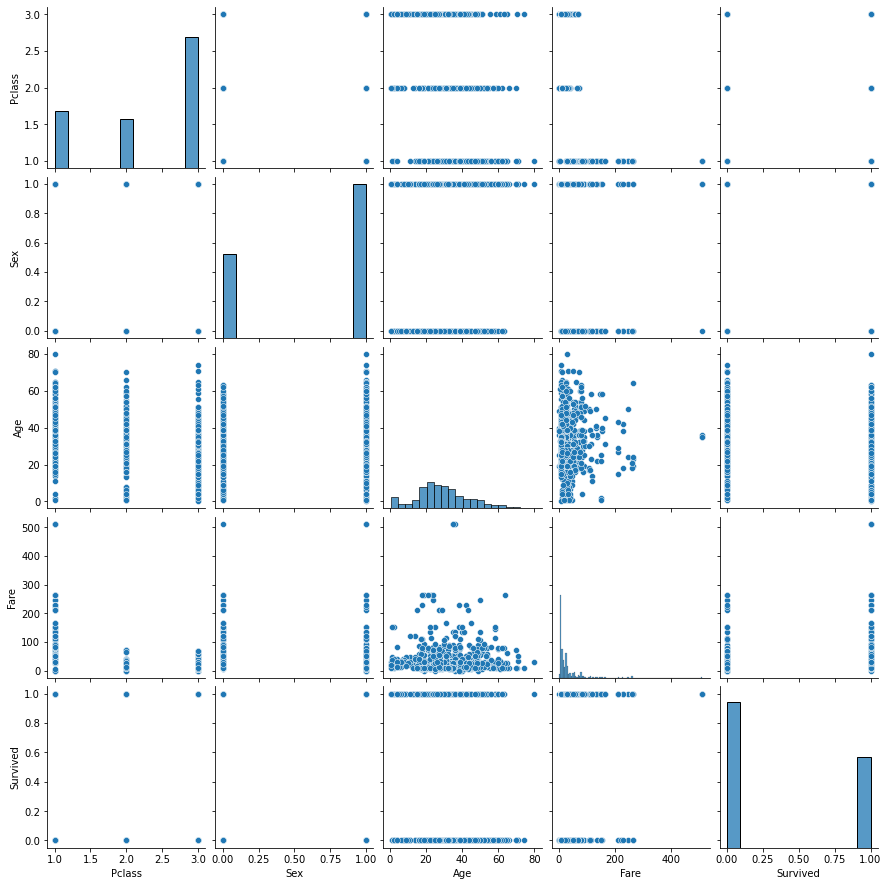

In [7]:
# Data Visualization using Pair Plots
import seaborn as sns
sns.pairplot(dataset)

In [8]:
# Finding null values from features x
x.columns[x.isna().any()]

Index(['Age'], dtype='object')

In [9]:
# Removing null values from features X
x.Age = x.Age.fillna(x.Age.mean())
dataset

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
888,3,0,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [10]:
# Test again to check null values from features x 
x.columns[x.isna().any()]

Index([], dtype='object')

In [11]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
# Train the algorithm
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()  
model.fit(x_train, y_train) 

GaussianNB()

In [13]:
# Prediction for all Test Data
y_pred = model.predict(x_test)
print(np.column_stack((y_pred,y_test)))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [14]:
# Predicting the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of the model: {}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model: 77.57847533632287%


In [15]:
# Predicting whether new customer with Age and Salary will Buy or Not
p = int(input("Enter the person's Pclass: "))
sex = int(input("Enter your gender: "))
age = int(input("Enter the person's age: "))
fare = float(input("Enter the persons's fare price: "))
person = [[p,sex,age,fare]]
result = model.predict(person)
print(result)
if(result==1):
    print("Person might be survived")
else:
    print("Person might not be survived")

Enter the person's Pclass: 1
Enter your gender: 0
Enter the person's age: 80
Enter the persons's fare price: 50.0
[1]
Person might be survived


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
